# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np

In [2]:
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (10., 5.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv("Temp_States.csv")


#### Print `temp`

In [4]:
temp.sample(3)

,City,State,Temperature
5,Treton,New Jersey,22.222222
0,NYC,New York,19.444444
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.info()
#city and State are strings
# Temperature is a column of decimal numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [6]:
temp[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
avg_temp_NYC = temp[temp["State"] == "New York"].agg({"Temperature":"mean"}).values
round(avg_temp_NYC[0],2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
temp[["City","State"]][temp["Temperature"] > 15]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
temp[["City"]][temp["Temperature"]>15]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
temp[["City"]][(temp["Temperature"]>15) & (temp["Temperature"]<20)]


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
mean_state = temp.groupby("State").agg({"Temperature":"mean"}).reset_index()
mean_state

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [12]:
std_state = temp.groupby("State").agg({"Temperature":"std"}).reset_index()
std_state

,State,Temperature
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


In [13]:
def meanstd (df,col1,col2):
    meandf = df.groupby(col1).agg({col2:"mean"}).reset_index().rename({col2:"media"}, axis=1)
    stddf = df.groupby(col1).agg({col2:"std"}).reset_index().rename({col2:"dev"}, axis=1)
    return meandf.merge(stddf, on = col1)
    

In [14]:
meanstd(temp,"State","Temperature")

,State,media,dev
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [15]:
employee = pd.read_csv("employee.csv")
employee.sample(3)

,Name,Department,Education,Gender,Title,Years,Salary
5,Eva,Sales,Bachelor,F,associate,2,55
1,Maria,IT,Master,F,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Explore the data types of the Temp dataframe. Comment your results

In [16]:
employee.info()
#all columns are srings but Years and Salary, that are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

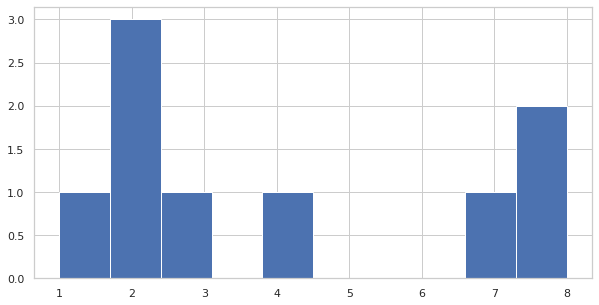

In [17]:
plt.hist(data = employee, x= "Years");

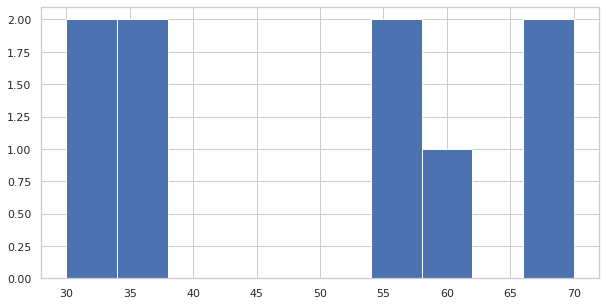

In [18]:
plt.hist(data = employee, x= "Salary");

#### What's the average salary in this company?

In [19]:
round(employee["Salary"].mean(),2)

48.89

#### What's the highest salary?

In [20]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [21]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [22]:
employee[employee["Salary"] == employee["Salary"].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [23]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [24]:
print((employee["Salary"][employee["Name"] == "David"].values)[0])

30


#### Print all the rows where job title is associate

In [25]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [26]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [27]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [28]:
employee[(employee["Title"] == "associate") & (employee["Salary"] >= 55)]


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [29]:
employee.groupby("Years").agg({"Salary":"mean"}).reset_index()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [30]:
employee.groupby("Title").agg({"Salary":"mean"}).reset_index()

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

##### * Hint : Quantiles vs Quartiles*

##### - In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

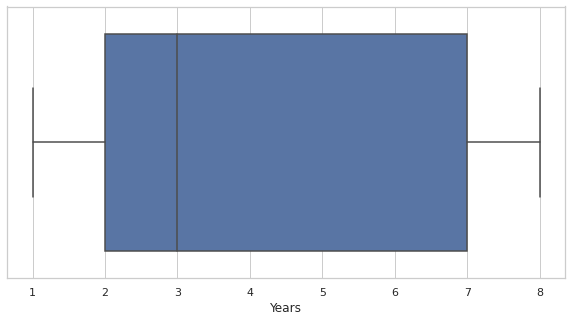

In [31]:
sns.boxplot(data=employee, x="Years");

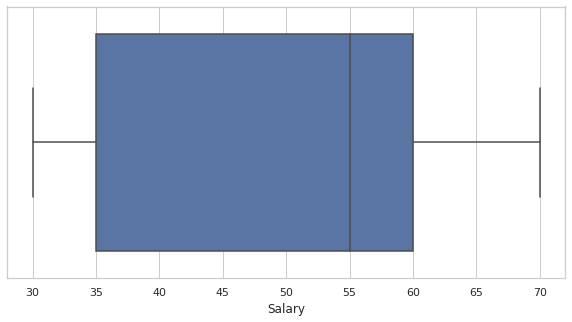

In [32]:
sns.boxplot(data=employee, x="Salary");

In [33]:
int(employee.Years.quantile(0.25))

2

In [34]:
int(employee.Salary.quantile(0.25))

35

In [35]:
int(employee.Years.quantile(0.75))

7

In [36]:
int(employee.Salary.quantile(0.75))

60

#### Is the mean salary per gender different?

In [37]:
employee.groupby("Gender").agg({"Salary":"mean"}).reset_index()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [38]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [39]:
maxdpt = employee.groupby("Department").agg({"Salary":"min"}).reset_index().rename({"Salary":"min"},axis=1)
mindpt = employee.groupby("Department").agg({"Salary":"max"}).reset_index().rename({"Salary":"max"},axis=1)
dpts = maxdpt.merge(mindpt, on = "Department")
dpts["Dif"] = dpts["max"] - dpts["min"]
dpts

,Department,min,max,Dif
0,HR,30,70,40
1,IT,30,70,40
2,Sales,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [40]:
Orders = pd.read_csv("Orders.csv")
Orders.drop("Unnamed: 0",axis=1,inplace=True)
Orders.head(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [41]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     397924 non-null  int64  
 1   StockCode     397924 non-null  object 
 2   year          397924 non-null  int64  
 3   month         397924 non-null  int64  
 4   day           397924 non-null  int64  
 5   hour          397924 non-null  int64  
 6   Description   397924 non-null  object 
 7   Quantity      397924 non-null  int64  
 8   InvoiceDate   397924 non-null  object 
 9   UnitPrice     397924 non-null  float64
 10  CustomerID    397924 non-null  int64  
 11  Country       397924 non-null  object 
 12  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 39.5+ MB


In [42]:
Orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [43]:
Orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [44]:
Orders.UnitPrice.min()

0.0

In [45]:
Orders.UnitPrice.max()

8142.75

#### Select all the customers we have in Spain

In [46]:
Orders[Orders["Country"] == "Spain"].head(5)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [47]:
Spain = Orders[Orders["Country"] == "Spain"]
len(Spain.CustomerID.unique())

30

#### Select all the customers who have bought more than 50 items ?

In [48]:
Orders[["CustomerID"]][Orders["Quantity"] > 50].sample(10)

,CustomerID
125242,14680
378645,17017
49735,16333
125850,14051
188924,15251
243586,13694
120255,13694
397108,18102
319887,18041
173160,16839


#### Select orders from Spain that are above 50 items

In [63]:
Orders[(Orders["Quantity"] > 50)&(Orders["Country"]=="Spain")].sample(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
32454,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
312656,573362,22597,2011,10,7,13,musical zinc heart decoration,72,2011-10-30 13:06:00,0.29,12597,Spain,20.88
289142,571255,72802B,2011,10,5,17,ocean scent candle in jewelled box,200,2011-10-14 17:13:00,1.25,12454,Spain,250.00


#### Select all free orders

In [62]:
Orders[Orders["amount_spent"] == 0].sample(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
352746,577129,22464,2011,11,4,19,hanging metal heart lantern,4,2011-11-17 19:52:00,0.0,15602,United Kingdom,0.0
34494,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
358629,577696,M,2011,11,1,11,manual,1,2011-11-21 11:57:00,0.0,16406,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [51]:
Orders[Orders.Description.str.contains("lunch bag")].sample(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
86489,547548,22662,2011,3,3,15,lunch bag dolly girl design,1,2011-03-23 15:37:00,1.65,15644,United Kingdom,1.65
159944,556942,22384,2011,6,3,16,lunch bag pink polkadot,10,2011-06-15 16:42:00,1.65,14222,United Kingdom,16.50
52722,543458,20727,2011,2,2,13,lunch bag black skull.,3,2011-02-08 13:28:00,1.65,14587,United Kingdom,4.95


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [52]:
Orders[(Orders.Description.str.contains("lunch bag")) & (Orders.year == 2011)].sample(3)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
396970,581450,20725,2011,12,4,17,lunch bag red retrospot,1,2011-12-08 17:54:00,1.65,16794,United Kingdom,1.65
187487,560448,20725,2011,7,2,9,lunch bag red retrospot,20,2011-07-19 09:29:00,1.65,12840,United Kingdom,33.00
373139,579062,20728,2011,11,1,10,lunch bag cars blue,10,2011-11-28 10:29:00,1.65,17651,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

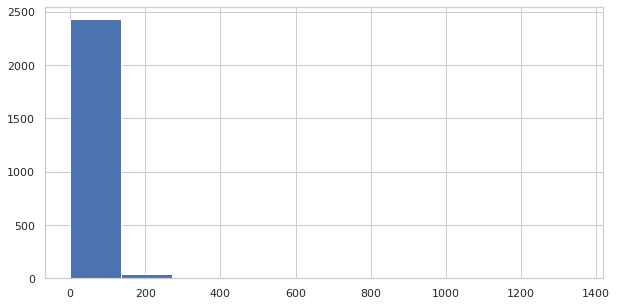

In [53]:
plt.hist(data = Orders[Orders["Country"] == "Spain"], x= "amount_spent");

#### Select all orders made in the month of August

In [61]:
Orders[Orders["month"]==8].head(5)# your answer here"]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [71]:
Orders["Country"].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

#### What's the  average amount of money spent by country

In [73]:
Orders.groupby("Country").agg({"amount_spent":"mean"}).reset_index()

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [74]:
Orders[Orders["UnitPrice"] == Orders["UnitPrice"].max()]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [76]:
Orders.groupby("year").agg({"amount_spent":"mean"}).reset_index()

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
